In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qbm import QBM, Duality
from tqdm import tqdm
from IPython.display import clear_output
from scipy.optimize import curve_fit

# matplotlib styling
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = '12'
plt.rc('text.latex', preamble=r'\usepackage{sfmath}')

# Separatrix

In [2]:
def deigvsN(Ni, Nf, alpha, Nd = 2):
    out = {
        "syst": [],
        "evecs": [],
        "evals": [],
        "d_eval": []
    }
    Ns = np.arange(Ni, Nf, Nd)
    for _, N_ in enumerate(tqdm(Ns)):
        s_ = QBM(N_, alpha)
        s_.gen_harper_states()
        out["evecs"].append(
            s_.harper_states['evecs'][N_//2-1 : N_//2+1]
        )
        out["evals"].append(
            s_.harper_states['evals'][N_//2-1 : N_//2+1]
        )
        out["d_eval"].append(np.diff(out["evals"][-1].real)[0])
        out["syst"].append(s_)
    out["Ns"] = Ns
    out["d_eval"] = np.array(out["d_eval"])
    return out

In [3]:
aper1 = deigvsN(4, 61, 1)
per1 = deigvsN(4, 61, 0)

100%|██████████| 29/29 [00:00<00:00, 212.01it/s]


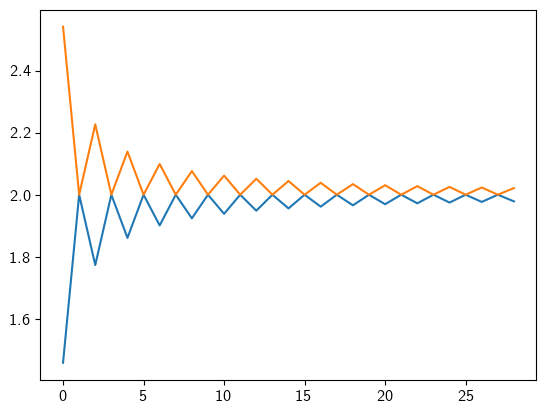

In [4]:
plt.plot([_[0].real for _ in aper1['evals']])
plt.plot([_[1].real for _ in aper1['evals']])
plt.show()

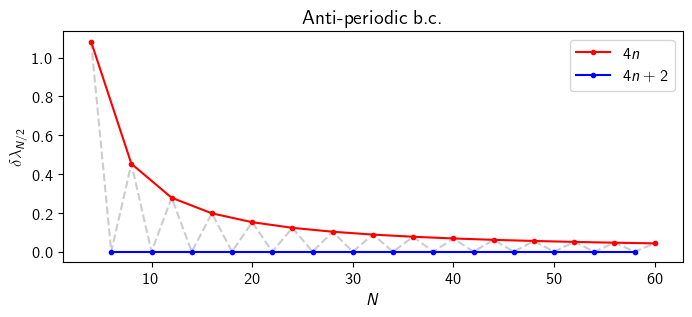

In [5]:
LOGSCALE = 0

plt.figure(figsize=(8, 3))
plt.plot(aper1["Ns"], aper1["d_eval"], 'k.--', alpha = 0.2)
plt.plot(aper1["Ns"][::2], aper1["d_eval"][::2], 'r.-', label = r"$4n$")
plt.plot(aper1["Ns"][1::2], aper1["d_eval"][1::2], 'b.-', label = r"$4n+2$")
plt.ylabel(r"$\delta \lambda_{N/2}$")
plt.xlabel(r"$N$")
plt.title("Anti-periodic b.c.")
plt.legend()
if LOGSCALE:
    plt.xscale('log')
    plt.yscale('log')
plt.show()

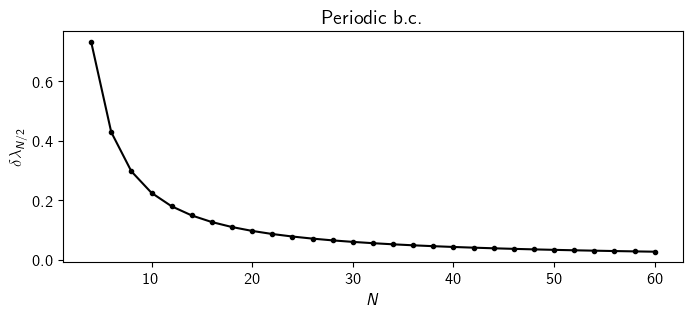

In [6]:
LOGSCALE = 0

plt.figure(figsize=(8, 3))
plt.plot(per1["Ns"], per1["d_eval"], 'k.-', alpha = 1)
# plt.plot(per1["Ns"][::2], per1["d_eval"][::2], 'r.-', label = r"$4n$")
# plt.plot(per1["Ns"][1::2], per1["d_eval"][1::2], 'b.-', label = r"$4n+2$")
plt.ylabel(r"$\delta \lambda_{N/2}$")
plt.xlabel(r"$N$")
plt.title("Periodic b.c.")
# plt.legend()
if LOGSCALE:
    plt.xscale('log')
    plt.yscale('log')
plt.show()

- check odd N
- separatrix states
- identity and jacobi elliptic fns, AL
- handbook of mathematical fns - jacobi
- pendulum eqn
- N third order 6000
- bethe ansatz

# Odd N

In [26]:
Ni = 3
Nf = 302
Ns = np.arange(Ni, Nf, 2)
systs = []
evals = []
evecs = []
for N_ in tqdm(Ns):
    s_ = QBM(N_)
    systs.append(s_)
    s_.gen_harper_states()
    evals.append(s_.harper_states['evals'][N_ // 2])
    evecs.append(s_.harper_states['evecs'][N_ // 2])
evals = np.array(evals)

100%|██████████| 150/150 [01:04<00:00,  2.33it/s]


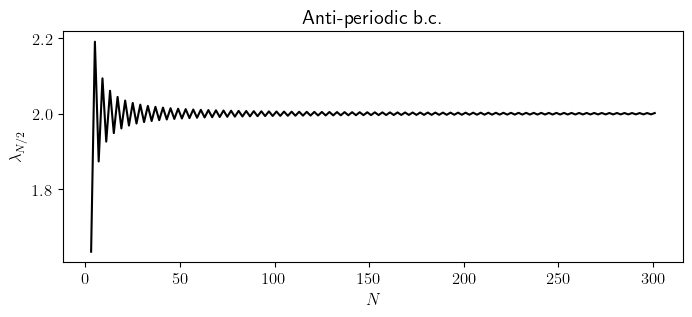

In [27]:
LOGSCALE = 0

plt.figure(figsize=(8, 3))
plt.plot(Ns, evals.real, 'k-')
plt.ylabel(r"$\lambda_{N/2}$")
plt.xlabel(r"$N$")
plt.title("Anti-periodic b.c.")
# plt.legend()
if LOGSCALE:
    plt.xscale('log')
    plt.yscale('log')
plt.show()

In [28]:
Ni = 3
Nf = 302
Ns2 = np.arange(Ni, Nf, 2)
systs2 = []
evals2 = []
evecs2 = []
for N_ in tqdm(Ns2):
    s_ = QBM(N_, 0)
    systs2.append(s_)
    s_.gen_harper_states()
    evals2.append(s_.harper_states['evals'][N_ // 2])
    evecs2.append(s_.harper_states['evecs'][N_ // 2])
evals2 = np.array(evals2)

100%|██████████| 150/150 [00:59<00:00,  2.52it/s]


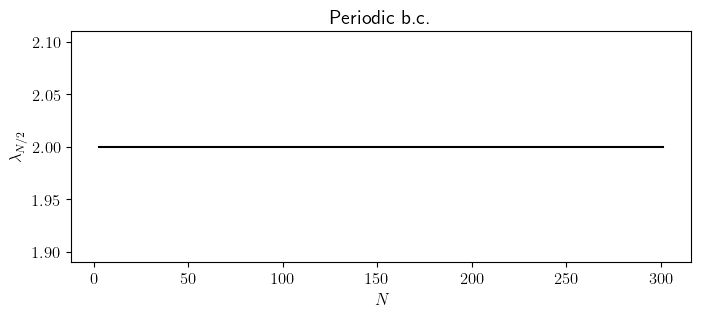

In [40]:
LOGSCALE = 0

plt.figure(figsize=(8, 3))
plt.plot(Ns2, np.round(evals2.real, 13), 'k-')
plt.ylabel(r"$\lambda_{N/2}$")
plt.xlabel(r"$N$")
plt.title("Periodic b.c.")
# plt.legend()
if LOGSCALE:
    plt.xscale('log')
    plt.yscale('log')
plt.show()

# Large N

In [12]:
np.round(np.power(10, np.arange(0, 6, 0.5)), 0).astype(int)

array([     1,      3,     10,     32,    100,    316,   1000,   3162,
        10000,  31623, 100000, 316228])

In [2]:
st = QBM(17)
st.gen_harper_states()

In [18]:
Ntest = np.round(np.power(10, np.arange(0, 3, 0.1)), 0).astype(int)
Ntest = np.sort(np.array(list(set(Ntest))))
Ntest

array([  1,   2,   3,   4,   5,   6,   8,  10,  13,  16,  20,  25,  32,
        40,  50,  63,  79, 100, 126, 158, 200, 251, 316, 398, 501, 631,
       794])

In [20]:
import time

In [31]:
tarr = []
for N_ in tqdm(Ntest):
    t_ = time.process_time()
    np.linalg.eig(np.random.random((N, N))+1j*np.random.random((N, N)))
    e_ = time.process_time() - t_
    tarr.append(e_)

100%|██████████| 27/27 [01:02<00:00,  2.32s/it]


In [29]:
t1 = time.process_time()
N = 500
np.linalg.eig(np.random.random((N, N))+1j*np.random.random((N, N)))
e1 = time.process_time() - t1
print(e1)

2.4159591429999985


In [35]:
Ns3 = np.round(np.power(10, np.arange(0, 5, 0.5)), 0).astype(int)
systs3 = []
evals3 = []
evecs3 = []
for N_ in tqdm(Ns3):
    s_ = QBM(N_, 0)
    systs3.append(s_)
    s_.gen_harper_states()
    evals3.append(s_.harper_states['evals'][N_ // 2])
    evecs3.append(s_.harper_states['evecs'][N_ // 2])
evals3 = np.array(evals3)

 90%|█████████ | 9/10 [3:15:14<45:27, 2727.67s/it]

: 

In [4]:
Ns3 = np.round(np.power(10, np.arange(0, 5, 0.5)), 0).astype(int)

In [5]:
Ns3

array([    1,     3,    10,    32,   100,   316,  1000,  3162, 10000,
       31623])

## Fitting

In [13]:
ap4nNs = aper1["Ns"][::2]
ap4nde = aper1["d_eval"][::2]
ap4n2Ns = aper1["Ns"][1::2]
ap4n2de = aper1["d_eval"][1::2]

pNs = per1["Ns"]
pde = per1["d_eval"]

In [14]:
def model1(x, m, c):
    return m*x + c

def model2(x, m, c):
    return c*(x**m)

In [15]:
popt_ap4n, pcov_ap4n = curve_fit(model2, ap4nNs, ap4nde)
popt_ap4n2, pcov_ap4n2 = curve_fit(model2, ap4n2Ns, ap4n2de)

popt_p, pcov_p = curve_fit(model2, pNs, pde)

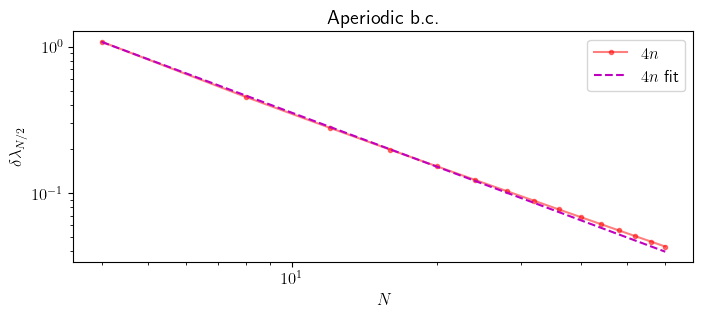

In [16]:
LOGSCALE = 1

plt.figure(figsize=(8, 3))
# plt.plot(aper1["Ns"], aper1["d_eval"], 'k.--', alpha = 0.2)
plt.plot(aper1["Ns"][::2], aper1["d_eval"][::2], 'r.-', label = r"$4n$", alpha = 0.5)
plt.plot(ap4nNs, model2(ap4nNs, *popt_ap4n), 'm--', label = r"$4n$ fit")
# plt.plot(aper1["Ns"][1::2], aper1["d_eval"][1::2], 'b.-', label = r"$4n+2$")
# plt.plot(ap4n2Ns, model2(ap4n2Ns, *popt_ap4n2), 'g--', label = r"$4n+2$ fit")
plt.ylabel(r"$\delta \lambda_{N/2}$")
plt.xlabel(r"$N$")
plt.title("Aperiodic b.c.")
plt.legend()
if LOGSCALE:
    plt.xscale('log')
    plt.yscale('log')
plt.show()

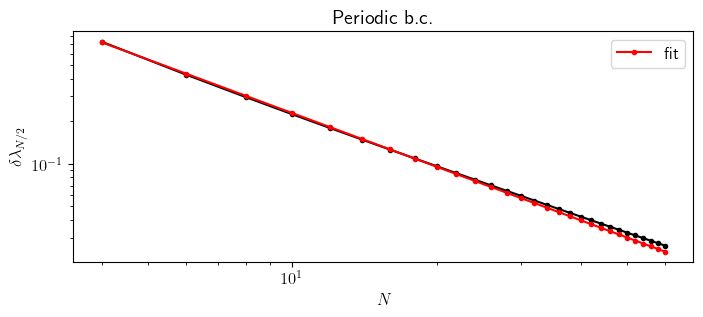

In [17]:
LOGSCALE = 1

plt.figure(figsize=(8, 3))
plt.plot(per1["Ns"], per1["d_eval"], 'k.-', alpha = 1)
# plt.plot(per1["Ns"][::2], per1["d_eval"][::2], 'r.-', label = r"$4n$", alpha = 0.5)
plt.plot(pNs, model2(pNs, *popt_p), 'r.-', label = r"fit")
# plt.plot(per1["Ns"][1::2], per1["d_eval"][1::2], 'b.-', label = r"$4n+2$")
# plt.plot(p4n2Ns, model2(p4n2Ns, *popt_p4n2), 'g--', label = r"$4n2$ fit")
plt.ylabel(r"$\delta \lambda_{N/2}$")
plt.xlabel(r"$N$")
plt.title("Periodic b.c.")
plt.legend()
if LOGSCALE:
    plt.xscale('log')
    plt.yscale('log')
plt.show()

In [18]:
lpopt_ap4n, lpcov_ap4n = curve_fit(model1, np.log(ap4nNs), np.log(ap4nde))
lpopt_ap4n2, lpcov_ap4n2 = curve_fit(model1, np.log(ap4n2Ns), np.log(ap4n2de))

lpopt_p, lpcov_p = curve_fit(model1, np.log(pNs), np.log(pde))

In [19]:
print('power fit')
print(f'[ap. 4n] \t m = {popt_ap4n[0]}, \t c = {popt_ap4n[1]}')
# print(f'[ap. 4n+2] \t m = {popt_ap4n2[0]}, \t c = {popt_ap4n2[1]}')
print(f'[p.] \t\t m = {popt_p[0]}, \t c = {popt_p[1]}')

power fit
[ap. 4n] 	 m = -1.2205317202618413, 	 c = 5.858844576837478
[p.] 		 m = -1.2611438133340171, 	 c = 4.168082063093013


In [20]:
print("log fit")
print(f'[ap. 4n] \t m = {lpopt_ap4n[0]}, \t c = {np.exp(lpopt_ap4n[1])}')
# print(f'[ap. 4n+2] \t m = {lpopt_ap4n2[0]}, \t c = {np.exp(lpopt_ap4n2[1])}')
print(f'[p.] \t\t m = {lpopt_p[0]}, \t c = {np.exp(lpopt_p[1])}')

log fit
[ap. 4n] 	 m = -1.1828844912265282, 	 c = 5.3532633149264175
[p.] 		 m = -1.2131090231515915, 	 c = 3.7049748685263206


# Autocorrelation

In [21]:
s = QBM(18, 1)
d = Duality(s)

s_ = QBM(18, 0)
d_ = Duality(s_)

100%|██████████| 18/18 [00:00<00:00, 19.95it/s]


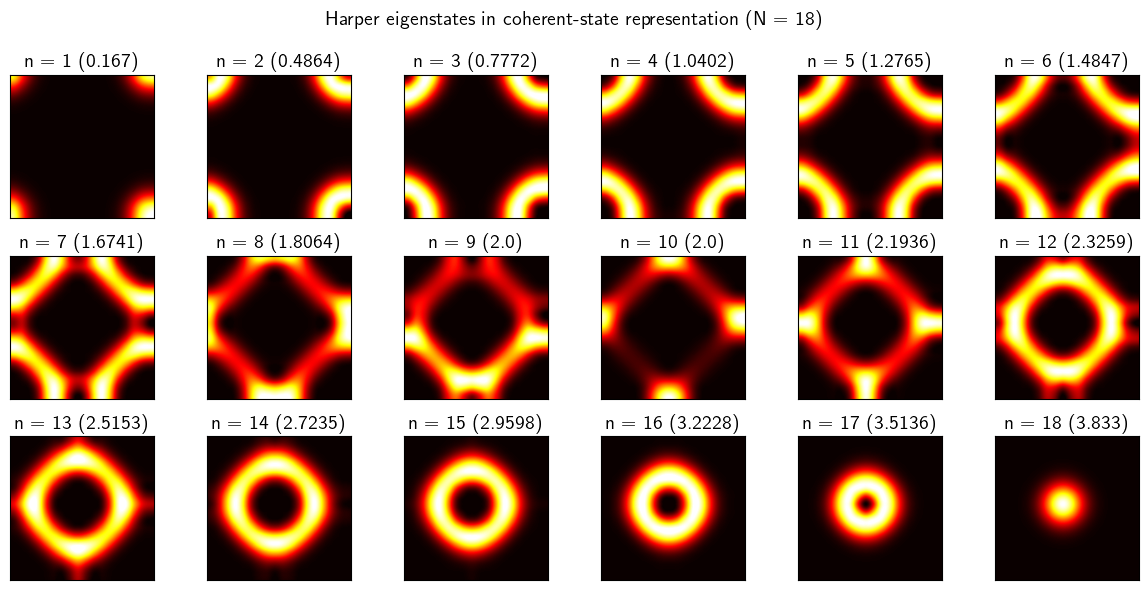

In [22]:
d.plot_harper_states(nc = 6)

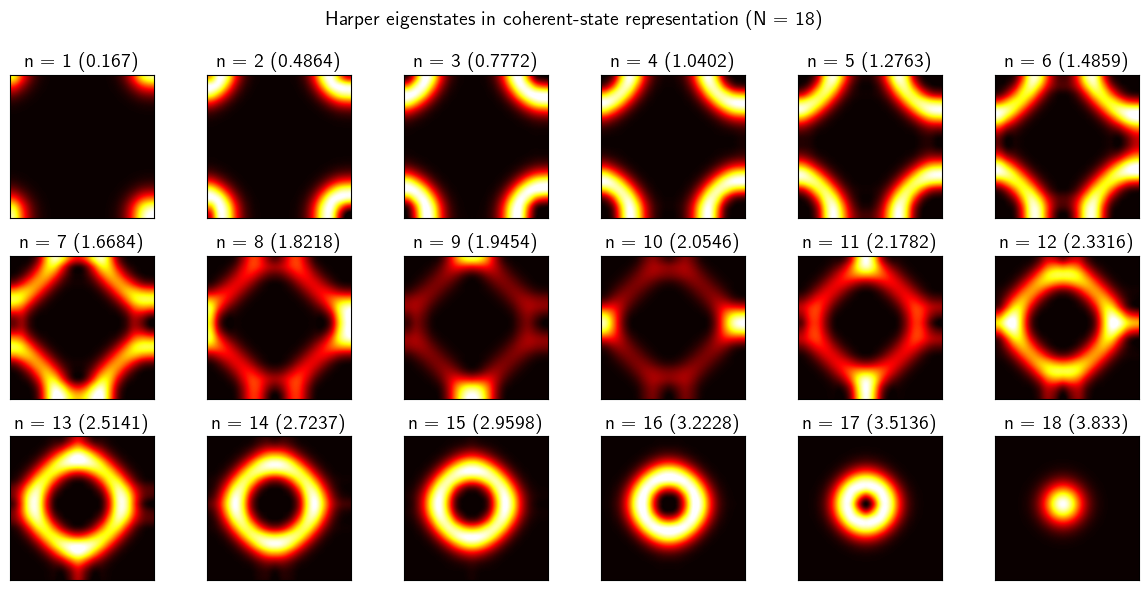

In [23]:
d_.plot_harper_states(nc = 6)